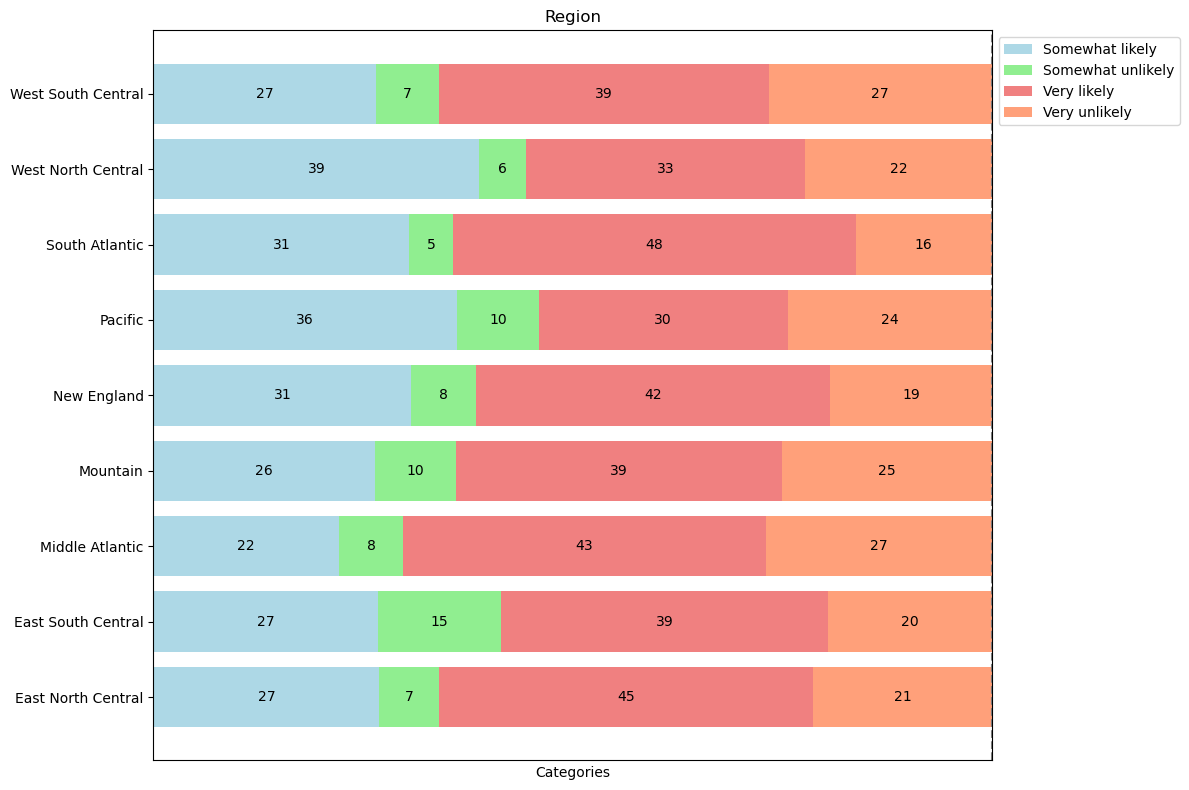

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Ввод данных
data = {
    'Category': ['East North Central', 'East South Central', 'Middle Atlantic', 'Mountain', 'New England', 'Pacific', 'South Atlantic', 'West North Central', 'West South Central'], 
    'Value1': [38,	11,	23,	19,	16,	67,	47,	21,	25],              
    'Value2': [10,	6,	8,	7,	4,	18,	8,	3,	7],             
    'Value3': [63,	16,	45,	28,	22,	55,	74,	18,	37],              
    'Value4': [30,	8,	28,	18,	10,	45,	25,	12,	25]               
}

df = pd.DataFrame(data)

df['Total'] = df[['Value1', 'Value2', 'Value3', 'Value4']].sum(axis=1)

df['Norm_Value1'] = df['Value1'] / df['Total']
df['Norm_Value2'] = df['Value2'] / df['Total']
df['Norm_Value3'] = df['Value3'] / df['Total']
df['Norm_Value4'] = df['Value4'] / df['Total']

df['Cumulative_Norm1'] = df['Norm_Value1']
df['Cumulative_Norm2'] = df['Cumulative_Norm1'] + df['Norm_Value2']
df['Cumulative_Norm3'] = df['Cumulative_Norm2'] + df['Norm_Value3']
df['Cumulative_Norm4'] = df['Cumulative_Norm3'] + df['Norm_Value4']

plt.figure(figsize=(12, 8))

plt.barh(df['Category'], df['Cumulative_Norm1'], label='Somewhat likely', color='lightblue')
plt.barh(df['Category'], df['Norm_Value2'], left=df['Cumulative_Norm1'], label='Somewhat unlikely', color='lightgreen')
plt.barh(df['Category'], df['Norm_Value3'], left=df['Cumulative_Norm2'], label='Very likely', color='lightcoral')
plt.barh(df['Category'], df['Norm_Value4'], left=df['Cumulative_Norm3'], label='Very unlikely', color='lightsalmon')


for index, row in df.iterrows():
    plt.text(row['Cumulative_Norm1'] / 2, index, str(round(row['Norm_Value1'] * 100)), va='center', ha='center')
    plt.text(row['Cumulative_Norm1'] + row['Norm_Value2'] / 2, index, str(round(row['Norm_Value2'] * 100)), va='center', ha='center')
    plt.text(row['Cumulative_Norm2'] + row['Norm_Value3'] / 2, index, str(round(row['Norm_Value3'] * 100)), va='center', ha='center')
    plt.text(row['Cumulative_Norm3'] + row['Norm_Value4'] / 2, index, str(round(row['Norm_Value4'] * 100)), va='center', ha='center')


# Настройки графика
plt.xlabel('Categories')
plt.title('Region')
plt.xlim(0, 1)  
plt.xticks([])
plt.axvline(x=1, color='grey', linestyle='--') 
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()  
plt.show()